In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as opt

In [16]:
trainX
trainY
testX
testY

def readFile(fileName):
    global trainX, trainY, testX, testY
    f = open("res/" + fileName + ".txt","r")
    m = int(f.readline())
    n = int(f.readline())
    trainD = [[int(feature) for feature in f.readline().split()] for i in range(0,n)]
    trainY = np.array([a.pop() for a in trainD])
    trainX = np.array(trainD)
    ones = np.ones(n).reshape(n,1)
    trainX = np.hstack((trainX, ones))
    
    n = int(f.readline())
    testD = [[int(feature) for feature in f.readline().split()] for i in range(0,n)]
    testY = np.array([a.pop() for a in testD])
    testX = np.array(testD)
    ones = np.ones(n).reshape(n,1)
    testX = np.hstack((testX, ones))
    
def nrmse(x, y, w):
    diff = w.dot(x.transpose()) - y
    return math.sqrt(diff.dot(diff) / x.shape[0]) / (y.max() - y.min())
    
def minima(iters, t):
    return opt.basinhopping(targetF, np.ones(trainX.shape[1]), niter = iters, T = t)

targetF = lambda w: ((w.dot(trainX.transpose()) - trainY) ** 2).sum()

In [23]:
bestT = 0
bestNRMSE = 100000
ts = [a/10 for a in range(1,11)] 

for t in ts:
    readFile("1")
    w = minima(1, t).x
    nrm = nrmse(testX, testY,w)
    if (nrm < bestNRMSE):
        bestNRMSE = nrm
        bestT = t
bestT

0.4

In [24]:
def process(fileName):
    readFile(fileName)
    iters = [1,2,3]
    resTest = []
    resTrain = []
    for i in iters:
        w = minima(i, bestT).x
        resTest.append(nrmse(testX, testY,w))
        resTrain.append(nrmse(trainX, trainY, w))
    plt.plot(iters, resTest)
    plt.ylabel('nrmse-test')
    plt.xlabel('iters')
    plt.show()
    plt.plot(iters, resTrain)
    plt.ylabel('nrmse-train')
    plt.xlabel('iters')
    plt.show()
    

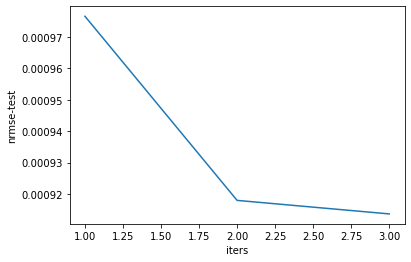

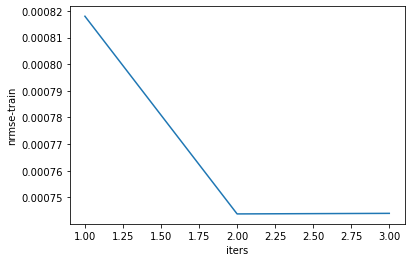

In [25]:
process("1")
